In [37]:
# 1. Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [38]:
# 2. Set Dataset Path
DATA_PATH = '../Data/raw data'
IMG_SIZE = (128, 128)

# Get class folders (skip hidden/system files)
classes = sorted([d for d in os.listdir(DATA_PATH) if not d.startswith('.')])
label_map = {cls: idx for idx, cls in enumerate(classes)}

print("Detected Classes:", classes)
print("Label Mapping:", label_map)


Detected Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Label Mapping: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


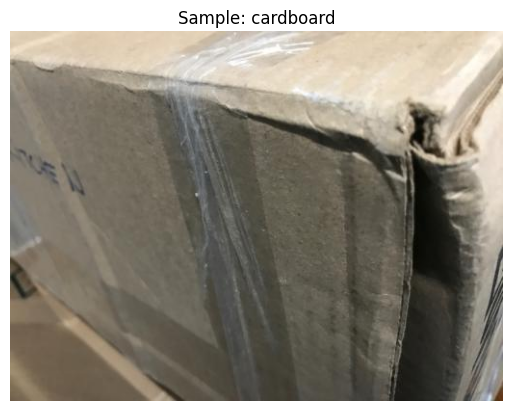

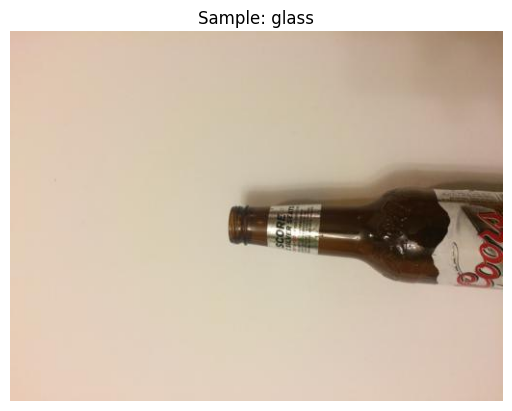

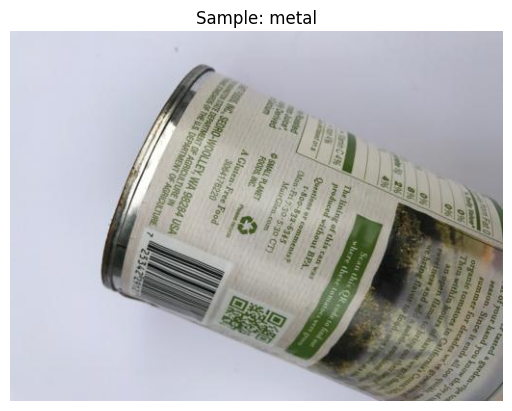

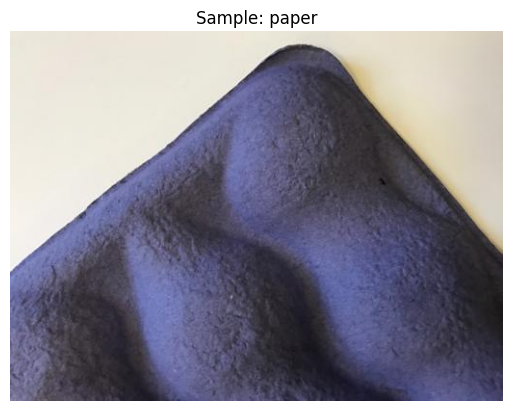

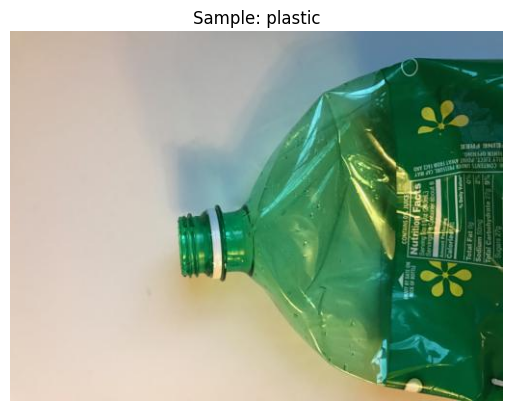

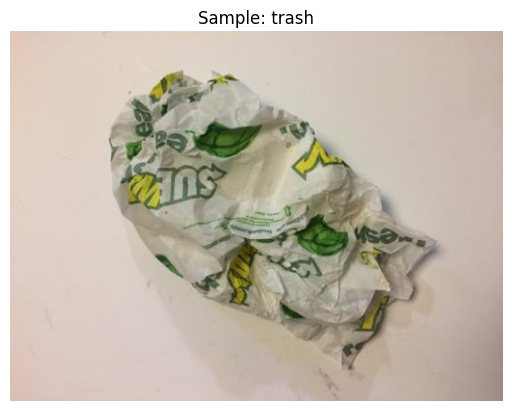

In [39]:
# 3. Show one sample image per class (optional but recommended)
for cls in classes:
    sample_file = os.listdir(os.path.join(DATA_PATH, cls))[0]
    sample_path = os.path.join(DATA_PATH, cls, sample_file)
    img = cv2.imread(sample_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Sample: {cls}")
    plt.axis("off")
    plt.show()

In [40]:
# 4. Load and Preprocess Images
def load_and_preprocess_images(data_dir):
    data = []
    labels = []

    for label, cls in enumerate(classes):
        path = os.path.join(data_dir, cls)
        for img_name in tqdm(os.listdir(path), desc=f"Processing {cls}"):
            try:
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, IMG_SIZE)
                img = img / 255.0  # Normalize to 0-1
                data.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error processing {img_name}: {e}")
                continue
    return np.array(data), np.array(labels)

X, y = load_and_preprocess_images(DATA_PATH)
print("Image array shape:", X.shape)
print("Label array shape:", y.shape)


Processing trash: 100%|██████████| 137/137 [00:00<00:00, 1158.20it/s]


Image array shape: (2527, 128, 128, 3)
Label array shape: (2527,)


In [41]:
# 5. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Train set size: 2021
Test set size: 506


In [42]:
# Define path for processed data
PROCESSED_PATH = "../Data/processed data"

# Save preprocessed data
np.save("../Data/processed data/X.npy", X)
np.save("../Data/processed data/y.npy", y)
print("Processed data saved successfully.")


Processed data saved successfully.
